In [65]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [66]:
from scipy import stats
import numpy as np

In [67]:
df = pd.read_excel("0727_2000Microns_3rdMsmt.xlsx")
df

,Cab.Bridge,Voltage steps,V(PZT),V(PZT).1,Voltage diff,real_V,M-E Sensor (Channel 1),ME_D_CH1,ME_A_dis_CH1,M-E Sensor (Channel 2),ME_D_CH2,ME_A_dis_CH2,Fringes,Fringe_D,fringe_A_dis,Time
0,(bit),NaN,(monitor)(before entering code),(after entering code),NaN,NaN,(microns),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65535,NaN,-0.001,NaN,NaN,NaN,1853.38,NaN,NaN,1317.18,NaN,NaN,NaN,NaN,NaN,09:52:00
2,29323,NaN,NaN,0.402,NaN,4.02,1853.34,NaN,NaN,1317.19,NaN,NaN,NaN,NaN,NaN,09:54:00
3,29723,400.0,0.41,1.459,1.057,14.59,1859.9,6.56,6.56,1323.60,6.41,6.41,20.0,6.3280,6.3280,09:55:00
4,30123,400.0,1.437,2.279,0.820,22.79,1866.42,6.52,13.08,1330.00,6.40,12.81,21.0,6.6444,12.9724,09:59:00
5,30523,400.0,2.237,3.036,0.757,30.36,1873.02,6.60,19.68,1336.42,6.42,19.23,22.0,6.9608,19.9332,10:01:00
6,30923,400.0,2.986,3.76,0.724,37.60,1879.69,6.67,26.35,1342.92,6.50,25.73,22.0,6.9608,26.8940,10:03:00
7,31323,400.0,3.706,4.45,0.690,44.50,1886.36,6.67,33.02,1349.42,6.50,32.23,23.0,7.2772,34.1712,10:05:00
8,31723,400.0,4.39,5.15,0.700,51.50,1893.07,6.71,39.73,1355.95,6.53,38.76,25.0,7.9100,42.0812,10:07:00
9,32123,400.0,5.09,5.86,0.710,58.60,1899.84,6.77,46.50,1362.54,6.59,45.35,22.0,6.9608,49.0420,10:09:00


In [68]:
#column of sensor 1 (channel 1)
ME_A_dis_CH1 = df["ME_A_dis_CH1"][3:27]
print(ME_A_dis_CH1)

3      6.56
4     13.08
5     19.68
6     26.35
7     33.02
8     39.73
9     46.50
10    52.55
11    59.91
12    67.87
13    75.84
14    67.82
15    59.84
16    53.15
17    46.35
18    39.58
19    32.75
20    26.15
21    19.47
22    12.87
23     6.33
24    -0.18
25    -6.65
26   -13.27
Name: ME_A_dis_CH1, dtype: float64


In [69]:
#column of sensor 2 (channel 2)
ME_A_dis_CH2 = df["ME_A_dis_CH2"][3:27]
print(ME_A_dis_CH2)

3      6.41
4     12.81
5     19.23
6     25.73
7     32.23
8     38.76
9     45.35
10    51.23
11    58.43
12    66.15
13    73.91
14    66.17
15    58.46
16    52.00
17    45.43
18    38.88
19    32.27
20    25.91
21    19.44
22    13.05
23     6.72
24     0.40
25    -5.86
26   -12.27
Name: ME_A_dis_CH2, dtype: float64


In [70]:
fringe_A_dis = df["fringe_A_dis"][3:27]
print(fringe_A_dis)

3      6.3280
4     12.9724
5     19.9332
6     26.8940
7     34.1712
8     42.0812
9     49.0420
10    55.6864
11    55.6864
12    63.5964
13    70.8736
14    62.6472
15    54.7372
16    47.1436
17    39.8664
18    32.2728
19    25.3120
20    18.0348
21    11.7068
22     5.3788
23    -2.2148
24    -9.8084
25   -16.4528
26   -24.3628
Name: fringe_A_dis, dtype: float64


In [71]:
real_V = df["real_V"][3:27]
print(real_V)

3     14.59
4     22.79
5     30.36
6     37.60
7     44.50
8     51.50
9     58.60
10    64.40
11    71.60
12    80.70
13    88.90
14    73.00
15    60.70
16    51.50
17    42.60
18    34.47
19    26.79
20    19.89
21    12.70
22     6.43
23    -0.13
24    -6.22
25   -12.14
26   -18.20
Name: real_V, dtype: float64


In [72]:
x1 = fringe_A_dis
y1 = ME_A_dis_CH1

In [73]:
info = stats.linregress(x1,y1)
info

LinregressResult(slope=0.9246327954907841, intercept=6.464128303061202, rvalue=0.9878305745185335, pvalue=2.8236385104568693e-19, stderr=0.031038463182468685, intercept_stderr=1.1989979954020302)

<IPython.core.display.Javascript object>


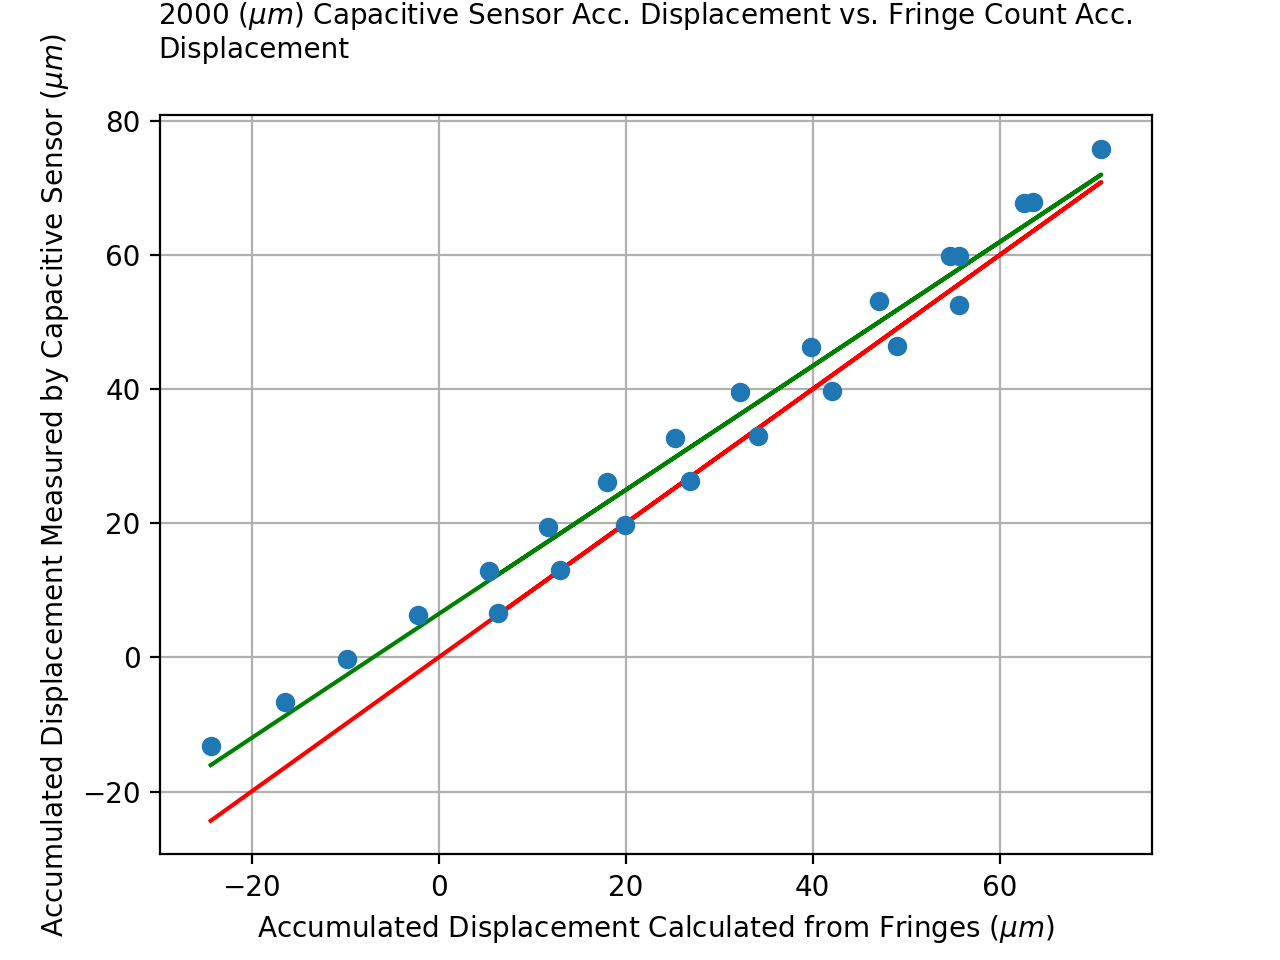

<function matplotlib.pyplot.show(block=None)>

In [74]:
#x error is 0.6
xerror = np.full_like(x1,0.6)
yerror = np.full_like(y1,0)

# plot of linear regression of data
plt.plot(x1,x1*info.slope+info.intercept,c = "green")

# plot of fringe displacement data, our "true" measurement
plt.plot(x1,x1,c = "red")

plt.errorbar(x1,y1,xerr=xerror,yerr=yerror,fmt = 'o')#,c = "orange")



plt.xlabel('Accumulated Displacement Calculated from Fringes ($\mu m$)')
plt.ylabel('Accumulated Displacement Measured by Capacitive Sensor ($\mu m$)')

t = '2000 ($\mu m$) Capacitive Sensor Acc. Displacement vs. Fringe Count Acc. Displacement'
plt.text(-30, 90, t, ha='left', rotation=0, wrap=True)



plt.grid()
plt.show

<IPython.core.display.Javascript object>


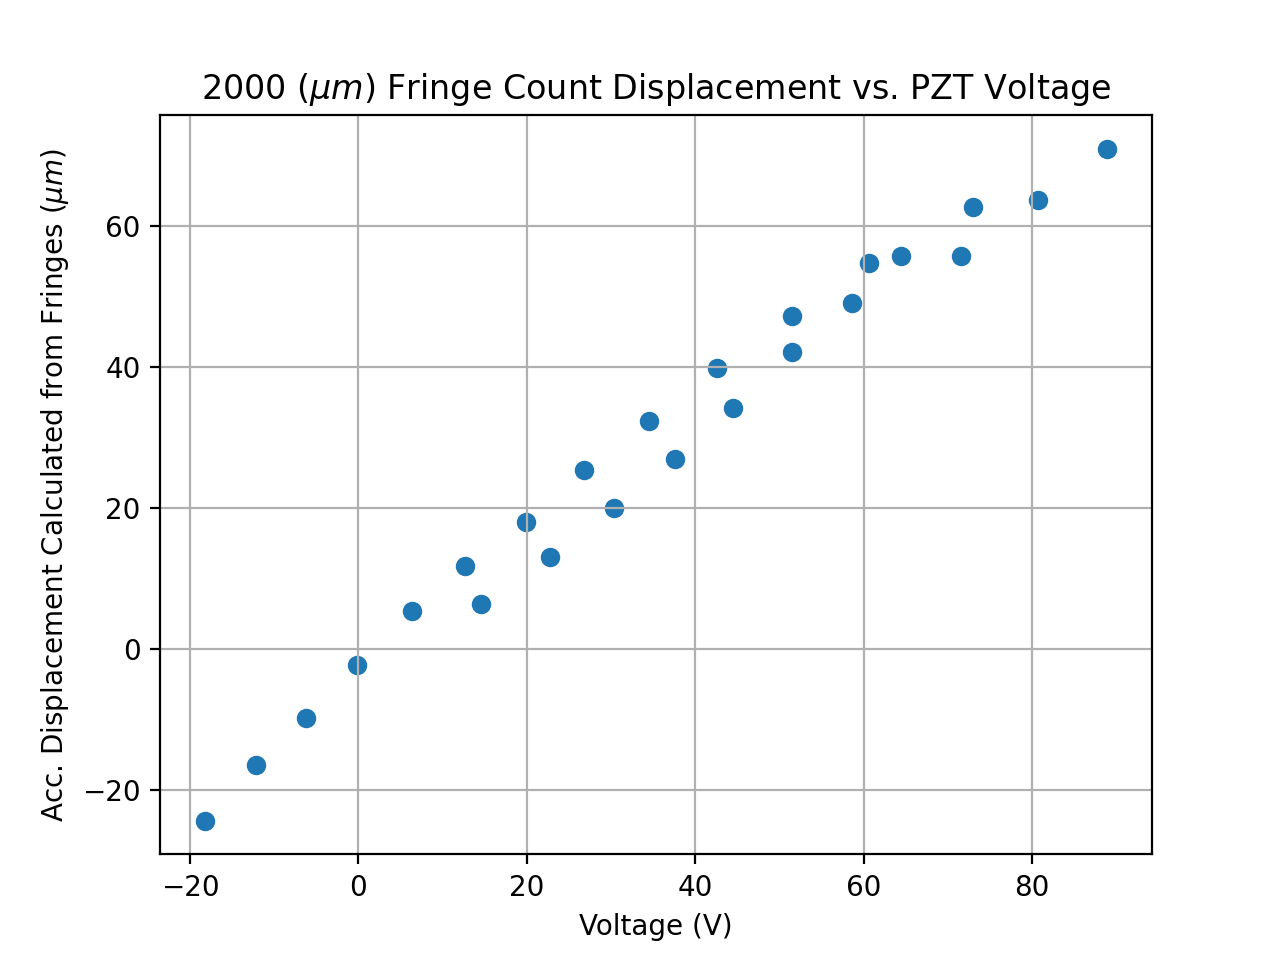

<function matplotlib.pyplot.show(block=None)>

In [81]:
plt.close("all")
x = real_V
y = fringe_A_dis

plt.scatter(x,y)


plt.xlabel('Voltage (V)')
plt.ylabel('Acc. Displacement Calculated from Fringes ($\mu m$)')
plt.title('2000 ($\mu m$) Fringe Count Displacement vs. PZT Voltage')


plt.grid()
plt.show

In [76]:
x3 = ME_A_dis_CH2
y3 = ME_A_dis_CH1

In [77]:
info_Sensors = stats.linregress(x3,y3)
info_Sensors

LinregressResult(slope=1.032764255647286, intercept=-0.4498332842979167, rvalue=0.999976447402835, pvalue=4.260937533917829e-49, stderr=0.0015112347437406107, intercept_stderr=0.060353696295336684)

<IPython.core.display.Javascript object>


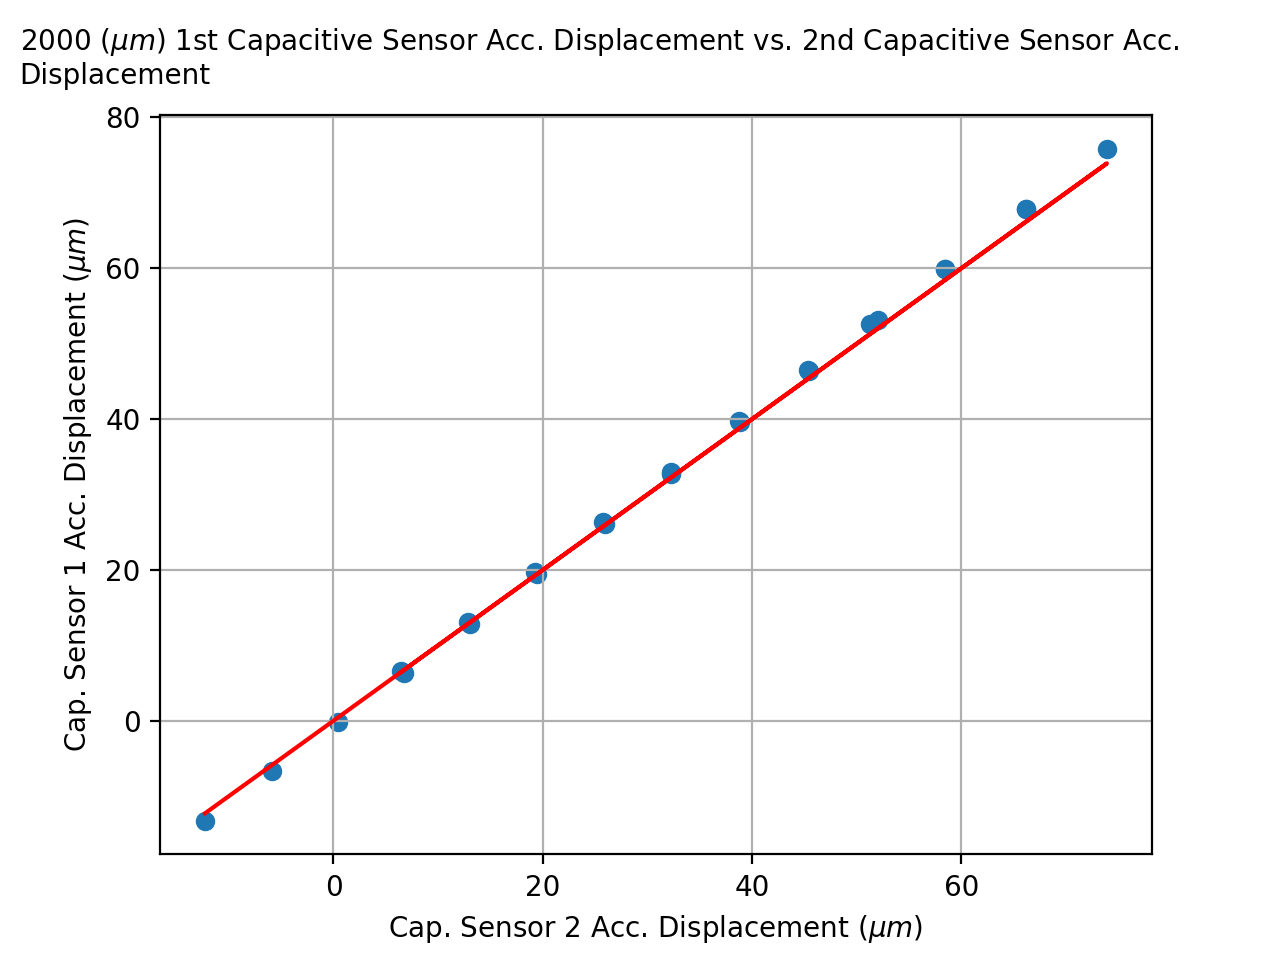

<function matplotlib.pyplot.show(block=None)>

In [80]:
#plot of first sensor vs. second sensor
plt.close("all")

#plot of our reference data, channel 2
plt.plot(x3,x3,c = "red")


plt.scatter(x3,y3)


plt.xlabel('Cap. Sensor 2 Acc. Displacement ($\mu m$)')
plt.ylabel('Cap. Sensor 1 Acc. Displacement ($\mu m$)')
t = '2000 ($\mu m$) 1st Capacitive Sensor Acc. Displacement vs. 2nd Capacitive Sensor Acc. Displacement'
plt.text(-30, 85, t, ha='left', rotation=0, wrap=True)


plt.grid()
plt.show